In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [3]:
# Pima Indian Dataset can be obtained online from Kaggle or Data Camp

# I obtained the Pima Indian Diabetes datasets from the github source below 
data="https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv"

data_df = pd.read_csv(data)


In [4]:
data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### No missing data 

In [6]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
data_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data_df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
print(data_df.shape)

(768, 9)


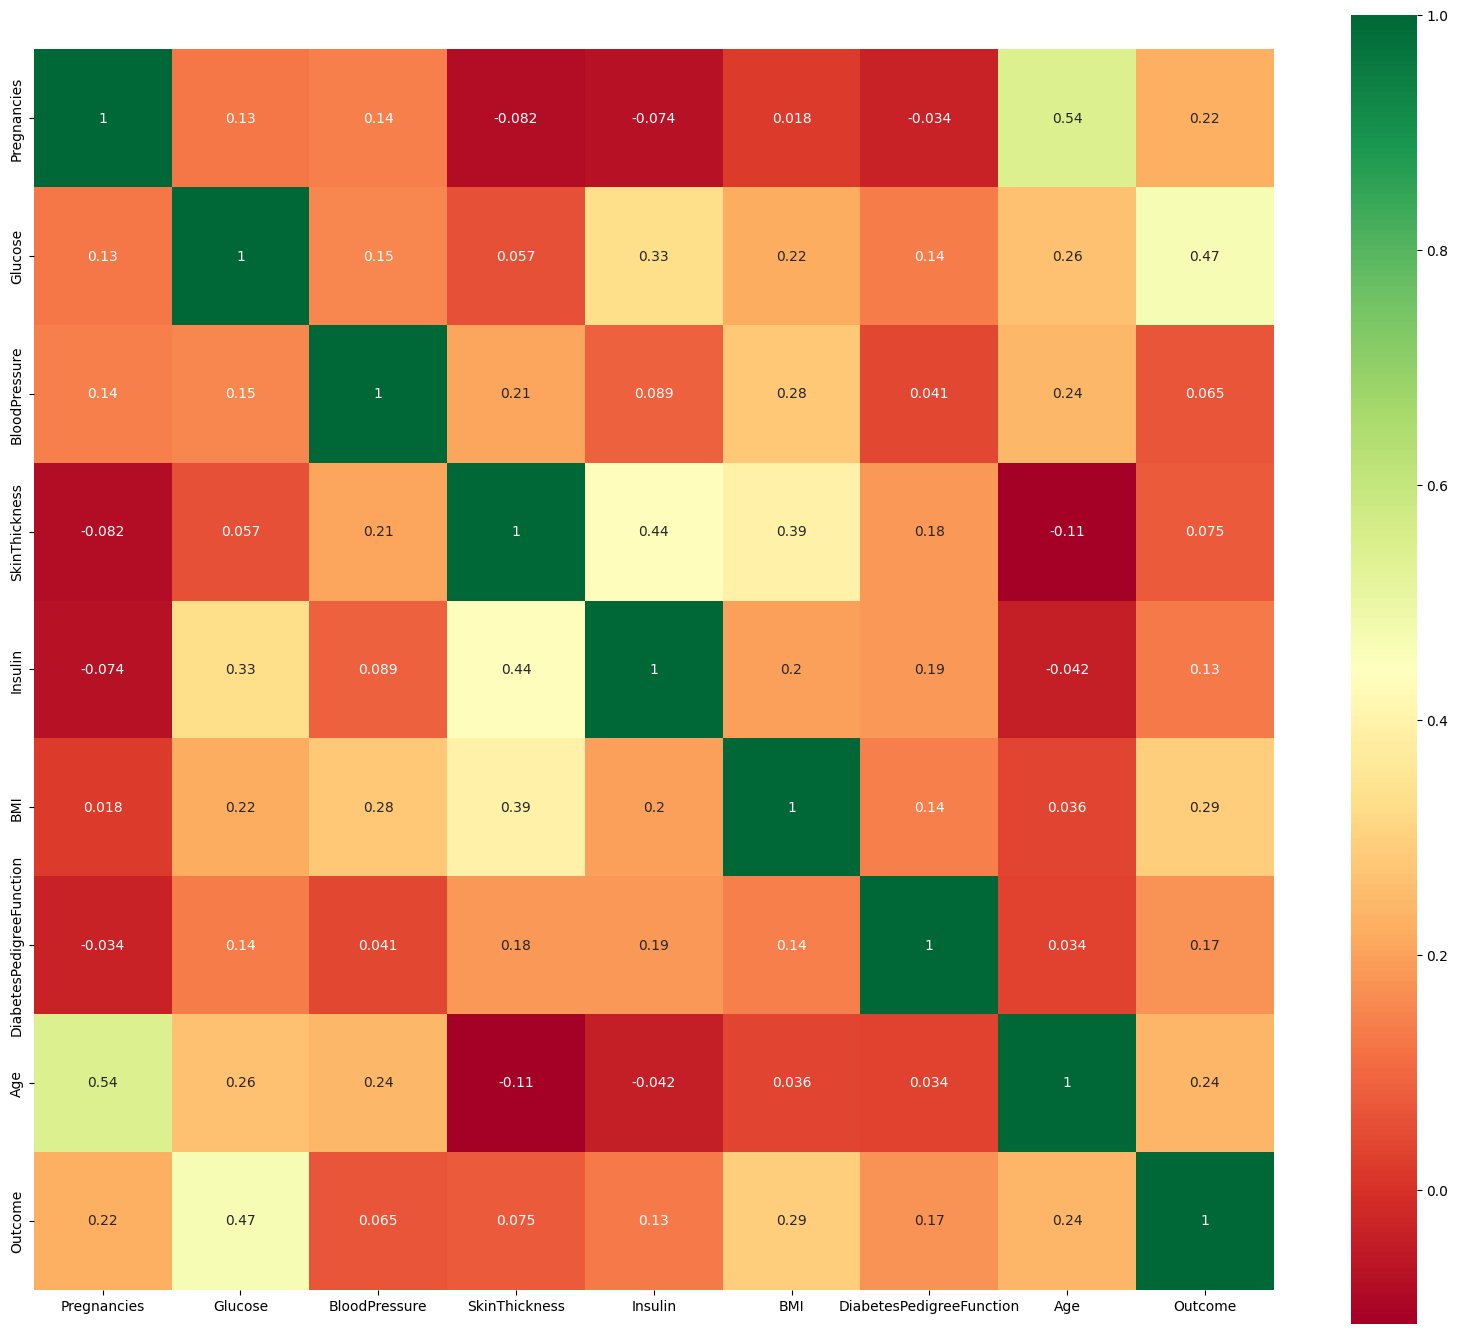

In [10]:
#lets make a corrleation plot to understand basic distribution 
corr_matrix = data_df.corr()
#lets create a heatmap first 
plt.figure(figsize=(20,17))
sns.heatmap(corr_matrix, square = True, annot = True, cmap = "RdYlGn")
plt.show()

In [11]:
corr_matrix_pearson = data_df.corr(method='pearson')
corr_matrix_pearson

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


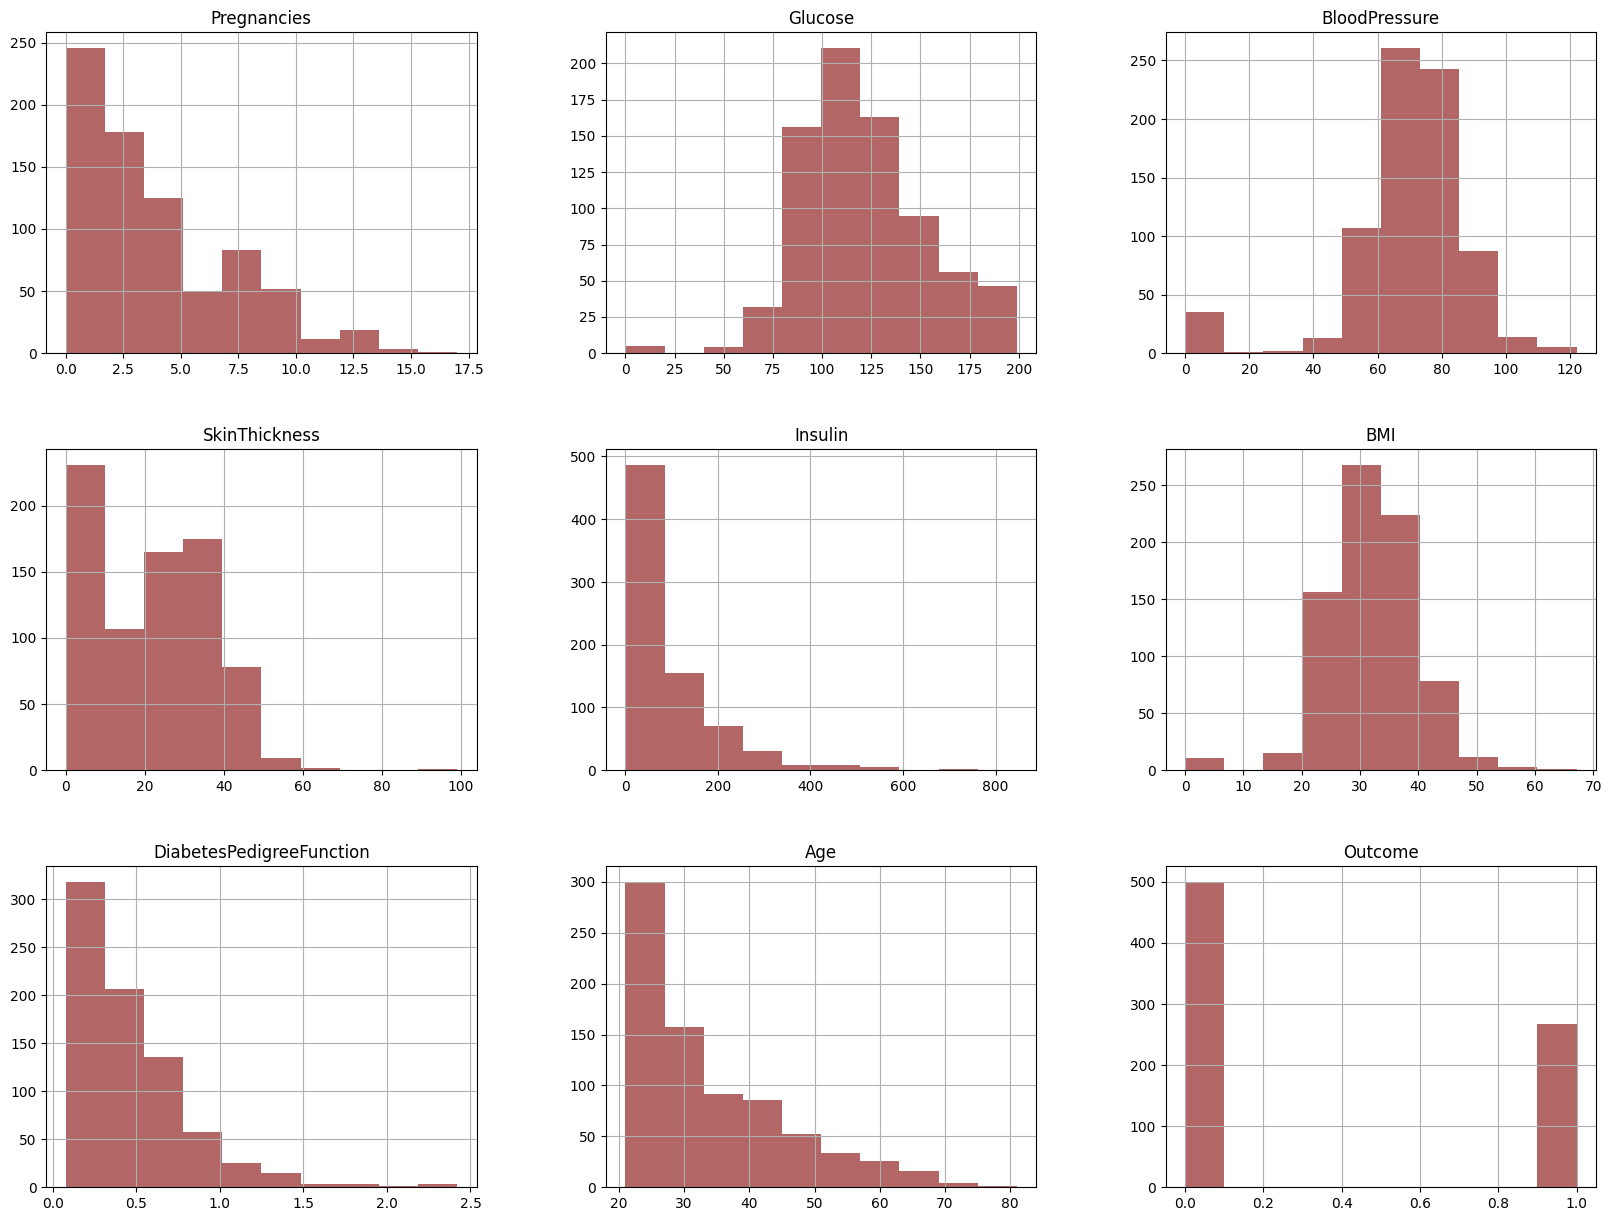

In [12]:
w = 5
data_df.hist(bins=10, figsize=(20,15), color='maroon', alpha=0.6, rwidth=w);


In [327]:
#understanding the features with high correlation as 
high_cor = data_df.corr()
high_cor_features = high_cor.index[abs(high_cor["Outcome"]) >= 0.15]
high_cor_features

Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome'],
      dtype='object')

In [328]:
#same as above; arbitary value of .20 lets say
high_cor = data_df.corr()
high_cor_features = high_cor.index[abs(high_cor["Outcome"]) >= 0.20]
high_cor_features

Index(['Pregnancies', 'Glucose', 'BMI', 'Age', 'Outcome'], dtype='object')

In [329]:
# get features for testing 
x = data_df.drop("Outcome", axis =1)

y = data_df["Outcome"]

print(y.shape)

(768,)


In [344]:
#split data to train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=10)


In [345]:
# instantiate the model (using the default parameters)
log_reg = LogisticRegression(max_iter = 2000)
# model always fit to the training data 
log_reg.fit(X_train, y_train)
log_reg

y_pred = log_reg.predict(X_test)

In [346]:
from sklearn.metrics import accuracy_score 
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.7291666666666666

In [347]:
#Model evaluation using confusion matrix 
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, y_pred)
con_mat

array([[107,  14],
       [ 38,  33]])

### Out of 768 total feature, 25% (192) was used for testing. Acc. to the confusion matrix 107 were correctly predicted 0s (True Negative) and 33 were correctly predicted to be 1s (True Positive). So the accuracy % = 107+33/192 = 72.91 down the diagonal. Could have been higher accruacy !! 

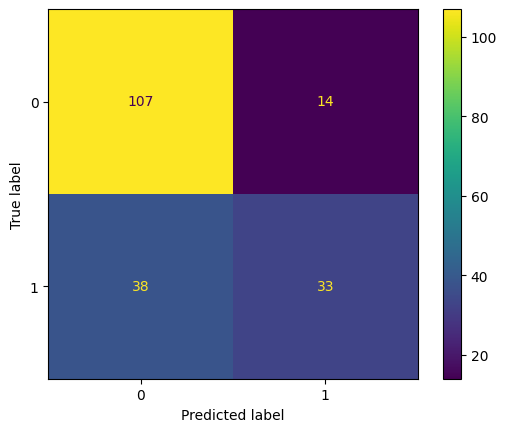

In [348]:
#lets visualize the confusion matrix 
#
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(con_mat)
disp.plot()
plt.show()

In [349]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.88      0.80       121
           1       0.70      0.46      0.56        71

    accuracy                           0.73       192
   macro avg       0.72      0.67      0.68       192
weighted avg       0.72      0.73      0.71       192

